# Energy Consumption Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

From PASQAL data, we note here the emissions of each type of device in tCO2 eq/hour:

In [2]:
# Emission cost (tCO2 eq/hour)
C_Fresnel = (2.1*3.6)/(1000*2.1)
C_Rubi = (4.2*3)/(1000*0.4)
C_GPU = 0.09/1000
C_Joliot = 215/1000

We can test that it is coherent with the given Excel document

In [9]:
T_QPU, T_GPU, T_Joliot = 458, 884000, 67
print("Emissions from Fresnel = {} eq tCO2".format(T_QPU*C_Fresnel))
print("Emissions from Rubi = {} eq tCO2".format(T_QPU*C_Rubi))
print("Emissions from GPU cluster = {} eq tCO2".format(T_GPU*C_GPU))
print("Emissions from Joliot Curie = {} eq tCO2".format(T_Joliot*C_Joliot))

Emissions from Fresnel = 1.6488 eq tCO2
Emissions from Rubi = 14.427 eq tCO2
Emissions from GPU cluster = 79.55999999999999 eq tCO2
Emissions from Joliot Curie = 14.405 eq tCO2


As explained in the Phase 3 document, we can give an evaluation of each device emission as data size increases. We show that the data needed $L$ by our Quantum Reservoir Computing (QRC) method is lower than $\tilde{L}$ for the Recurent Neural Network (RNN) method. Therefore, we define \textit{fct_L} to precise this relationship. In addition, we can play with the sample lenght S use in the QRC. We choose in the following plot that $L = \tilde{L}^{\frac{1}{3}}$ and $S = \sqrt{L}$

In [4]:
S, T_pulse, N_runs = 10, 10**(-6), 52
f_Joliot, f_GPU = 7*10**(15), 5*10**(11)
def fct_S(L):
    return(np.sqrt(fct_L(L)))

def fct_L(L_tilde):
    #return(L_tilde)
    return((L_tilde)**(1/3))

Tilde_L = [1000*i for i in range(1, 10**4+1)]
E_Fresnel = [N_runs*C_Fresnel*2**5*(fct_L(L)-fct_S(L))*(1+fct_S(L)*T_pulse)/(3600) for L in Tilde_L]
E_Rubi = [N_runs*C_Rubi*2**5*(fct_L(L)-fct_S(L))*(1+fct_S(L)*T_pulse)/(3600) for L in Tilde_L]
E_GPU = [N_runs*C_GPU*(2.496*10**5*L/10)/f_GPU*L*(L/100)/(3600) for L in Tilde_L]
E_Joliot = [N_runs*C_Joliot*(2.496*10**5*L/10)/f_Joliot*L*(L/100)/(3600) for L in Tilde_L]

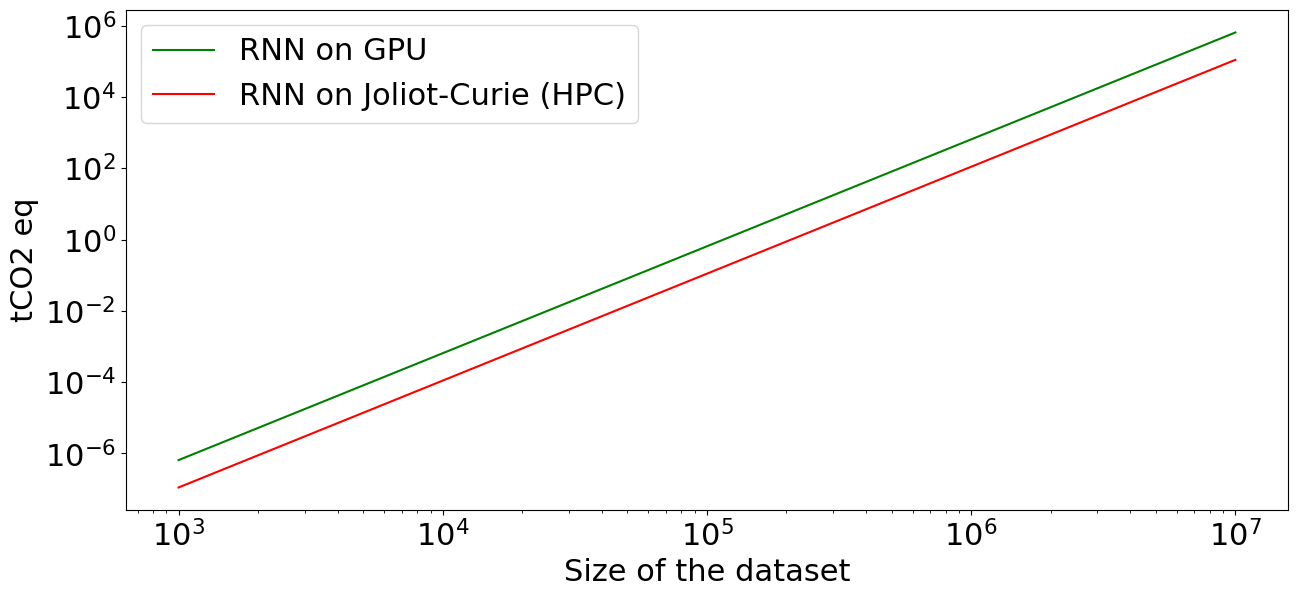

In [5]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(15, 6.5))
#plt.title("Evolution of Carbon Emission for Time Series Forecasting \n as Data Size increases")
plt.xlabel("Size of the dataset")
plt.ylabel("tCO2 eq")
plt.xscale("log")
plt.yscale("log")
plt.plot(Tilde_L, E_GPU, label="RNN on GPU", color='green')
plt.plot(Tilde_L, E_Joliot, label="RNN on Joliot-Curie (HPC)", color='red')
#plt.xticks(Tilde_L)
plt.legend()
plt.savefig('Emission_Comparison_RNN.pdf')
plt.show()

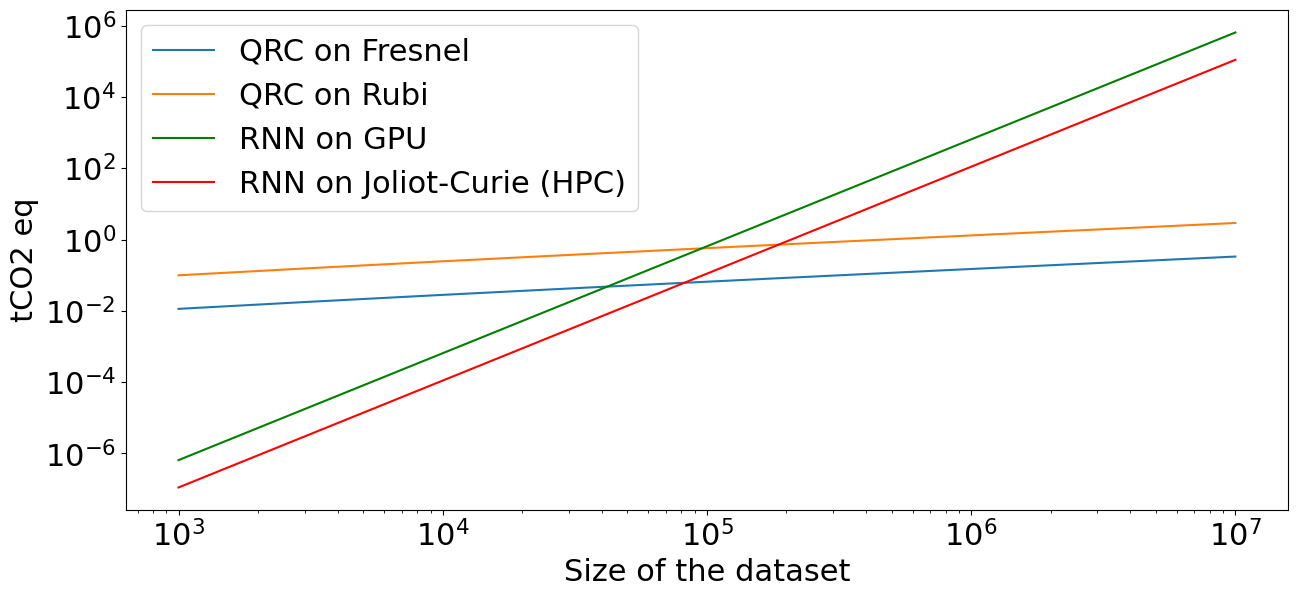

In [6]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(15, 6.5))
#plt.title("Evolution of Carbon Emission for Time Series Forecasting \n as Data Size increases")
plt.xlabel("Size of the dataset")
plt.ylabel("tCO2 eq")
plt.xscale("log")
plt.yscale("log")
plt.plot(Tilde_L, E_Fresnel, label="QRC on Fresnel")
plt.plot(Tilde_L, E_Rubi, label="QRC on Rubi")
plt.plot(Tilde_L, E_GPU, label="RNN on GPU", color='green')
plt.plot(Tilde_L, E_Joliot, label="RNN on Joliot-Curie (HPC)", color='red')
#plt.xticks(Tilde_L)
plt.legend()
plt.savefig('Emission_Comparison.pdf')
plt.show()

### Derivation of the benchmark values:
Considering the same values as before, we can derive the different method times and their carbon emissions:

In [7]:
L = 350*10**3

E_Fresnel = N_runs*C_Fresnel*2**5*(fct_L(L)-fct_S(L))*(1+fct_S(L)*T_pulse)/(3600)
E_Rubi = N_runs*C_Rubi*2**5*(fct_L(L)-fct_S(L))*(1+fct_S(L)*T_pulse)/(3600)
E_GPU = N_runs*C_GPU*(2.496*10**5*L/10)/f_GPU*L*(L/100)/(3600)
E_Joliot = N_runs*C_Joliot*(2.496*10**5*L/10)/f_Joliot*L*(L/100)/(3600)

T_Fresnel = N_runs*2**5*(fct_L(L)-fct_S(L))*(1+fct_S(L)*T_pulse)/(3600)
T_Rubi = N_runs*2**5*(fct_L(L)-fct_S(L))*(1+fct_S(L)*T_pulse)/(3600)
T_GPU = N_runs*(2.496*10**5*L/10)/f_GPU*L*(L/100)/(3600)
T_Joliot = N_runs*(2.496*10**5*L/10)/f_Joliot*L*(L/100)/(3600)

In [13]:
print("Emissions from Fresnel = {} eq tCO2             Duration = {} h".format(E_Fresnel, T_Fresnel))
print("Emissions from Rubi = {} eq tCO2                Duration = {} h".format(E_Rubi, T_Rubi))
print("Emissions from GPU = {} eq tCO2 /               Duration = {} h".format(E_GPU, T_GPU))
print("Emissions from Joliot-Curie HPC = {} eq tCO2     Duration = {} h".format(E_Joliot, T_Joliot))

Emissions from Fresnel = 0.1032989391275349 eq tCO2             Duration = 28.69414975764858
Emissions from Rubi = 0.9038657173659302 eq tCO2                Duration = 28.69414975764858
Emissions from GPU = 27.824159999999996 eq tCO2 /               Duration = 884000
Emissions from Joliot-Curie HPC = 4.747773333333334 eq tCO2     Duration = 67
